In [1]:
import layoutparser as lp
import cv2

In [2]:
image = cv2.imread("tinywow_letok-11-2023-web_26381759_22.png")
image = image[..., ::-1]


In [3]:
# model = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',
#                                  extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.4],
#                                  label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"}) 

model = lp.Detectron2LayoutModel('lp://NewspaperNavigator/faster_rcnn_R_50_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.4],
                                 label_map = {0: "Photograph", 1: "Illustration", 2: "Map", 3: "Comics/Cartoon", 4: "Editorial Cartoon", 5: "Headline", 6: "Advertisement"})

# model = lp.Detectron2LayoutModel('lp://PrimaLayout/mask_rcnn_R_50_FPN_3x/config',
#                                  extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.4],
#                                  label_map={1:"TextRegion", 2:"ImageRegion", 3:"TableRegion", 4:"MathsRegion", 5:"SeparatorRegion", 6:"OtherRegion"}) 

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


In [4]:
layout = model.detect(image)
    # Detect the layout of the input image

/Users/tomislav/Library/Caches/pypoetry/virtualenvs/angebotmk-ml-Gpt_k2Fo-py3.11/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [5]:
layout._blocks

[TextBlock(block=Rectangle(x_1=1224.879638671875, y_1=582.9371948242188, x_2=1600.8221435546875, y_2=1100.412353515625), text=None, id=None, type=Advertisement, parent=None, next=None, score=0.9801504611968994),
 TextBlock(block=Rectangle(x_1=587.8739013671875, y_1=1607.805419921875, x_2=1085.3671875, y_2=2121.62255859375), text=None, id=None, type=Advertisement, parent=None, next=None, score=0.9784030914306641),
 TextBlock(block=Rectangle(x_1=1102.916748046875, y_1=1614.8365478515625, x_2=1587.51220703125, y_2=2120.0830078125), text=None, id=None, type=Advertisement, parent=None, next=None, score=0.9521763324737549),
 TextBlock(block=Rectangle(x_1=59.613895416259766, y_1=1110.0140380859375, x_2=435.98968505859375, y_2=1604.261962890625), text=None, id=None, type=Advertisement, parent=None, next=None, score=0.9283189177513123),
 TextBlock(block=Rectangle(x_1=62.99721908569336, y_1=589.7990112304688, x_2=427.3695983886719, y_2=1092.681884765625), text=None, id=None, type=Advertisement, 

In [6]:
new_img = lp.draw_box(image, layout, box_width=3)
    # Show the detected layout of the input image

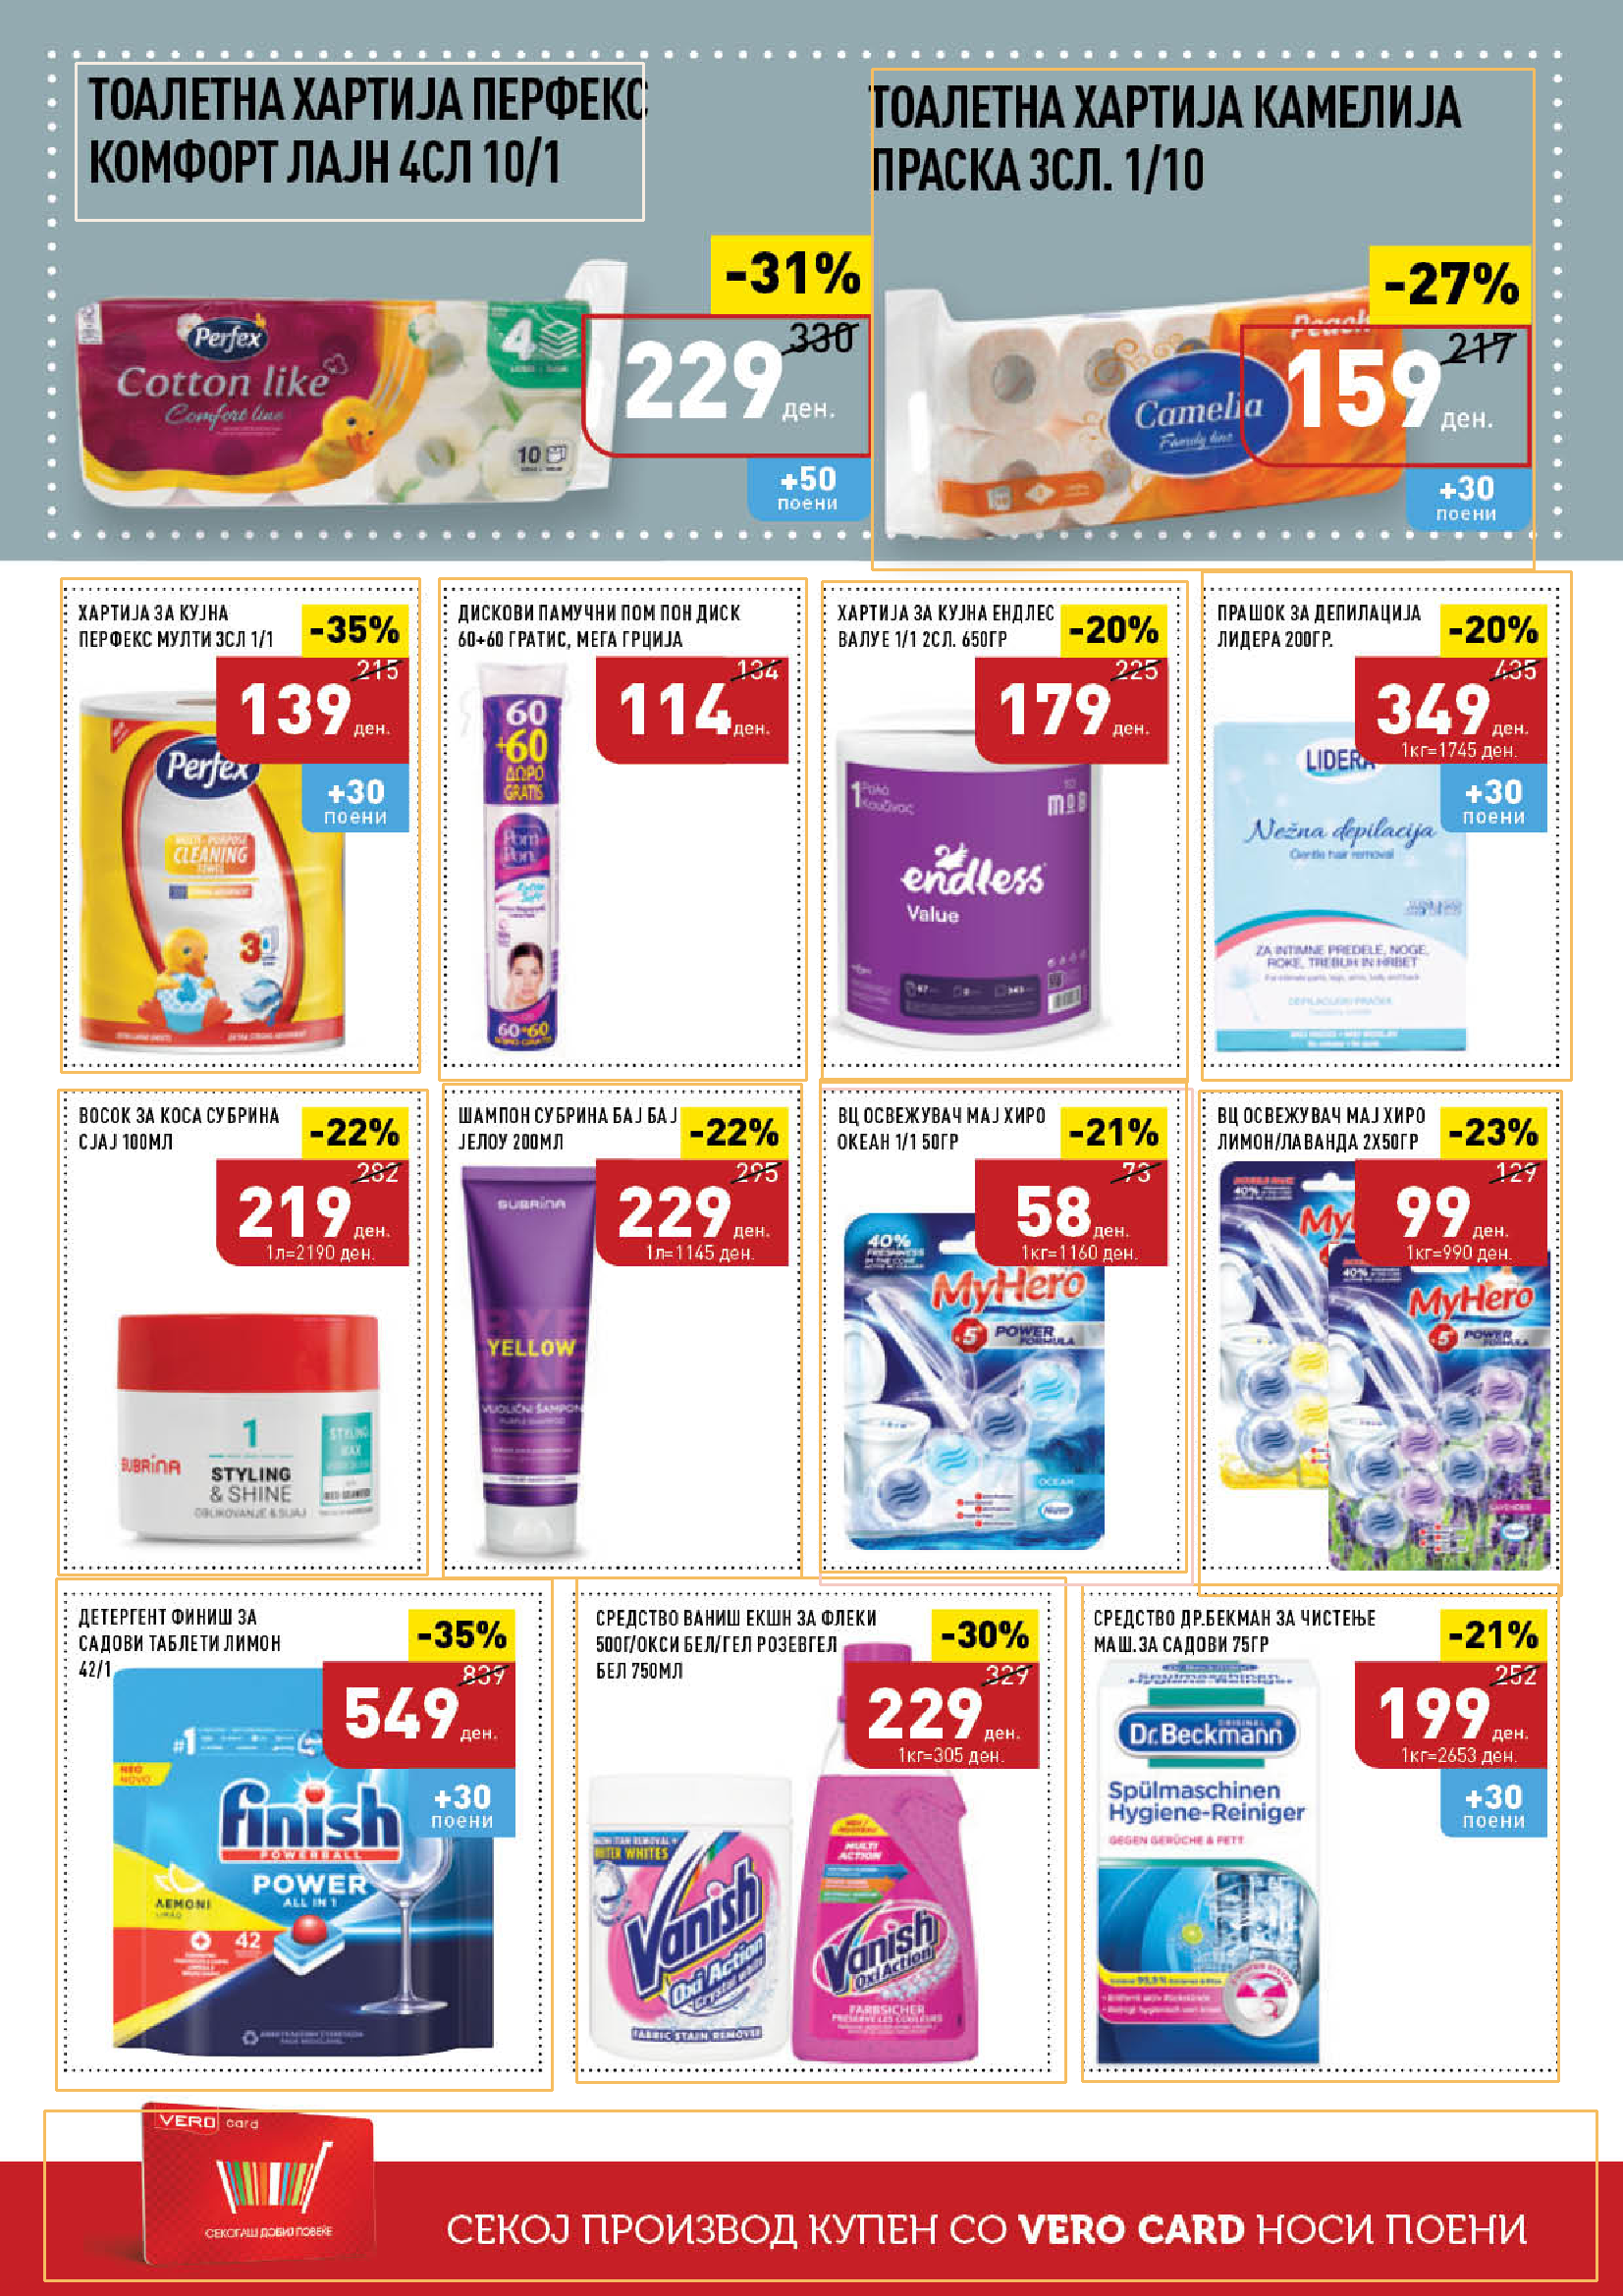

In [7]:
new_img

In [8]:
rec = layout._blocks[4].block
rec

Rectangle(x_1=62.99721908569336, y_1=589.7990112304688, x_2=427.3695983886719, y_2=1092.681884765625)

In [9]:
cropped_img = new_img.crop((rec.x_1, rec.y_1, rec.x_2, rec.y_2))

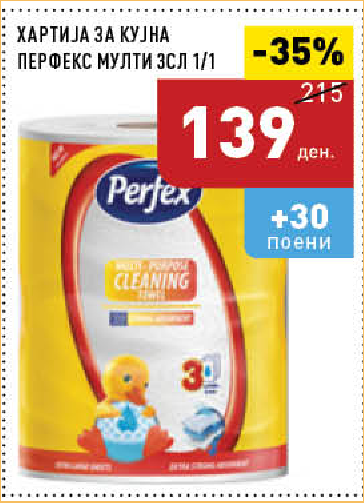

In [10]:
cropped_img